In [8]:
import pmdarima as pm

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Agrofood_co2_emission.csv")
data = data[data['Area'] == "India"]
data.drop(['Area'], axis=1, inplace=True)
data.set_index('Year', inplace=True)
columns=data.columns

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

In [4]:
imp = SimpleImputer(strategy='mean')
data = imp.fit_transform(data)
data = pd.DataFrame(data, columns=columns)

In [5]:
y = data['total_emission']
X = data.drop(['total_emission'],axis=1)

In [6]:
def prin(i, X):
    pca = PCA(n_components=i)
    X = pca.fit_transform(X)
    X = pd.DataFrame(X)
    return X

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20,random_state=0)

c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


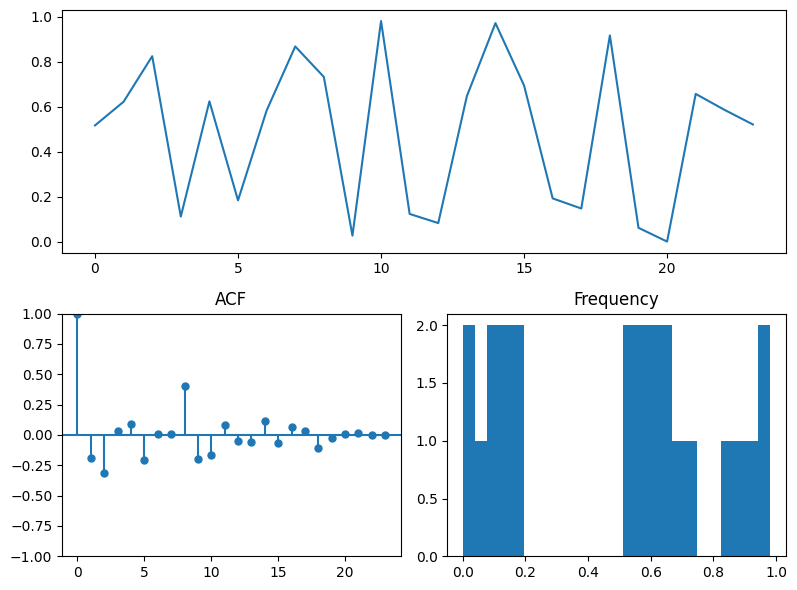

In [21]:
from pmdarima.utils import tsdisplay

tsdisplay(y_train, lag_max=23)

In [22]:
fit1 = pm.auto_arima(X=X_train, y=y_train, m=3, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[3] intercept   : AIC=-431.704, Time=2.58 sec
 ARIMA(0,0,0)(0,0,0)[3] intercept   : AIC=-456.698, Time=1.41 sec
 ARIMA(1,0,0)(1,0,0)[3] intercept   : AIC=-443.471, Time=1.32 sec
 ARIMA(0,0,1)(0,0,1)[3] intercept   : AIC=-454.663, Time=3.69 sec
 ARIMA(0,0,0)(0,0,0)[3]             : AIC=-461.583, Time=1.22 sec
 ARIMA(0,0,0)(1,0,0)[3] intercept   : AIC=-447.764, Time=3.06 sec
 ARIMA(0,0,0)(0,0,1)[3] intercept   : AIC=-457.894, Time=2.53 sec
 ARIMA(0,0,0)(1,0,1)[3] intercept   : AIC=-442.120, Time=5.63 sec
 ARIMA(1,0,0)(0,0,0)[3] intercept   : AIC=-451.767, Time=1.72 sec
 ARIMA(0,0,1)(0,0,0)[3] intercept   : AIC=-453.081, Time=1.74 sec
 ARIMA(1,0,1)(0,0,0)[3] intercept   : AIC=-449.169, Time=3.42 sec

Best model:  ARIMA(0,0,0)(0,0,0)[3]          
Total fit time: 28.369 seconds


In [23]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:                        SARIMAX   Log Likelihood                 259.791
Date:                Tue, 19 Sep 2023   AIC                           -461.583
Time:                        11:31:16   BIC                           -427.419
Sample:                             0   HQIC                          -452.519
                                 - 24                                         
Covariance Type:                  opg                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Savanna fires                      -0.0122   7.86e-05   -155.260      0.000      -0.012      -0.012
Forest fires                        0.0050      0.000     44.254      0.000       0.005       0.005
Crop Residues                       0.0174      0.000     49.304      0.000       0.017       0.018
Rice Cultivation                    0.0095   9.79e-05     96.670      0.000       0.009       0.010
Drained organic soils (CO2)        -0.0590      0.000   -187.001      0.000      -0.060      -0.058
Pesticides Manufacturing            0.0142   3.81e-05    371.922      0.000       0.014       0.014
Food Transport                      0.0259   5.46e-05    475.130      0.000       0.026       0.026
Forestland                          0.3028      0.000   1802.585      0.000       0.303       0.303
Net Forest conversion               0.0151      0.000    126.593      0.000       0.015       0.015
Food Household Consumption         -0.1404      0.000   -348.254      0.000      -0.141      -0.140
Food Retail                         0.0500      0.000    261.338      0.000       0.050       0.050
On-farm Electricity Use             0.2822      0.000    668.874      0.000       0.281       0.283
Food Packaging                      0.0171      0.000    160.844      0.000       0.017       0.017
Agrifood Systems Waste Disposal     0.0832      0.001    117.205      0.000       0.082       0.085
Food Processing                    -0.0144      0.000    -89.319      0.000      -0.015      -0.014
Fertilizers Manufacturing           0.0597      0.000    226.143      0.000       0.059       0.060
IPPU                                0.4098      0.000   1033.624      0.000       0.409       0.411
Manure applied to Soils             0.1300      0.001    127.917      0.000       0.128       0.132
Manure left on Pasture              0.0486      0.001     49.249      0.000       0.047       0.050
Manure Management                  -0.1853      0.002   -104.179      0.000      -0.189      -0.182
Fires in organic soils          -5.835e-17        nan        nan        nan         nan         nan
Fires in humid tropical forests     0.0272   7.62e-05    357.673      0.000       0.027       0.027
On-farm energy use                  0.0370   9.14e-05    404.460      0.000       0.037       0.037
Rural population                   -0.0154      0.001    -30.594      0.000      -0.016      -0.014
Urban population                    0.0264      0.002     11.603      0.000       0.022       0.031
Total Population - Male            -0.0027      0.000     -9.343      0.000      -0.003      -0.002
Total Population - Female          -0.0391      0.001    -71.047      0.000      -0.040      -0.038
Average Temperature °C             -0.0041   6.13e-05    -67.326      0.000      -0.004      -0.004
sigma2                            2.31e-11   4.68e-08      0.000      1.000   -9.17e-08    9.17e-08
=========================================

In [25]:
fit1.fit(y_train)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 3),
      suppress_warnings=True, with_intercept=False)

In [32]:
from sklearn.metrics import mean_squared_error
pred, conf_int = fit1.predict(n_periods=X_test.shape[0], return_conf_int=True)
print("Test MSE: %.3f" % mean_squared_error(y_test, pred))

Test MSE: 0.486


c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\aryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
